In [1]:
#from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [24]:
from PIL import Image
import numpy as np

In [2]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 3, 1)
        self.conv2 = nn.Conv2d(20, 50, 3, 1)
        self.fc1 = nn.Linear(5*5*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)#13
        x = F.relu(self.conv2(x))#11
        x = F.max_pool2d(x, 2, 2)#5*5*50
        x = x.view(-1, 5*5*50)#
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [4]:
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [5]:
class Argument(object):
    def __init__(self, *initial_data, **kwargs):
        for dictionary in initial_data:
            for key in dictionary:
                setattr(self, key, dictionary[key])
        for key in kwargs:
            setattr(self, key, kwargs[key])

In [9]:
dict_args = {'batch_size':64, 'test_batch_size':1000, 'epochs':5, 'save_model':True, 'lr':0.01, 'log_interval':10, 'momentum':0.5}
    
args = Argument(dict_args)

use_cuda = not False and torch.cuda.is_available()

torch.manual_seed(1)
device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}


#Train Loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()#,transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)

#test Loader
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()#,transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)


model = NN().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

In [63]:
for epoch in range(1, args.epochs + 1):
    train(args, model, device, train_loader, optimizer, epoch)
    test(args, model, device, test_loader)

if (args.save_model):
    torch.save(model.state_dict(),"mnist_cnn.pt")
    print('model saved')    

64
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293756
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.298661
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.282684
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.279946
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.266068
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.262856
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.235043
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.225290
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.213677
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.181577
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.149939
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.103021
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.058856
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.948759
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.839440
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.766229
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.623598
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.335483
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.069836
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.985036
Train Epoch: 1 [12800/6000

Train Epoch: 4 [27520/60000 (46%)]	Loss: 0.020364
Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.060391
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.114169
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.046408
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.112381
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.081570
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.024183
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.183454
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.063648
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.022916
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.070456
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.167829
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.086851
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.084041
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.026451
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.015320
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.052019
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.068813
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.077089
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.134661


In [10]:
checkpoint = torch.load("mnist_cnn.pt")

In [11]:
model = NN().to(device)

In [12]:
checkpoint

OrderedDict([('conv1.weight', tensor([[[[ 0.2173, -0.1457, -0.0472],
                        [ 0.1698, -0.3446,  0.1965],
                        [-0.0918,  0.1328,  0.0325]]],
              
              
                      [[[-0.0287,  0.1225,  0.0109],
                        [ 0.1853, -0.0514,  0.0128],
                        [ 0.0664,  0.1725,  0.0913]]],
              
              
                      [[[ 0.2920,  0.1032, -0.1245],
                        [-0.2014, -0.0571, -0.1447],
                        [-0.1063,  0.0156,  0.1977]]],
              
              
                      [[[ 0.3205, -0.1145,  0.3317],
                        [ 0.1673,  0.4429,  0.3268],
                        [-0.4580, -0.4813, -0.2726]]],
              
              
                      [[[ 0.3805,  0.0457,  0.1936],
                        [-0.0620,  0.3935, -0.1528],
                        [ 0.3280,  0.0301, -0.2189]]],
              
              
                      [[[ 0.1

In [13]:
model.load_state_dict(checkpoint)

In [14]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [15]:
example_data.shape

torch.Size([1000, 1, 28, 28])

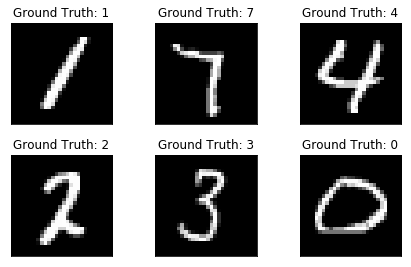

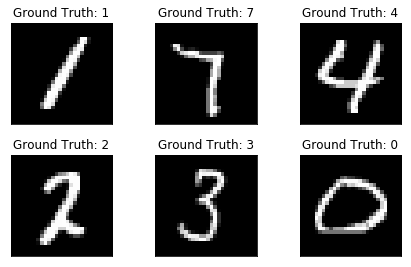

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

3


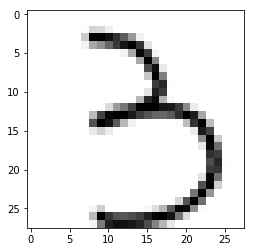

In [30]:
def result():
    img = Image.open("draw.png")
    plt.imshow(img, cmap='gray', interpolation='none')
    img = np.array(img)/255
    img = np.around(img, decimals = 4) 
    img = np.dot(img[...,:4],[0, 0, 0, 1])
    img = torch.Tensor(img)
    img = torch.unsqueeze(img , 0)
    img = torch.unsqueeze(img , 0)
    prediction = inference(img)
    print(prediction)
result()

In [28]:
def inference(img):
  output = model(img)
  output = torch.exp(output)
  top_prob,top_class=output.topk(1,dim=1)
  return top_class.item()

In [ ]:
#if running on colab
from google.colab import files
files.download('mnist_cnn.pt') 